# 1.1_ss_clustering

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

In [3]:
import matplotlib.pyplot as plt

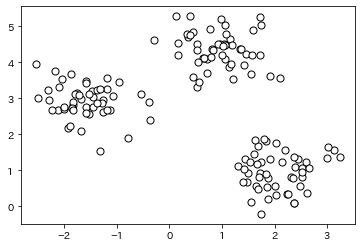

In [4]:
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=0)

In [7]:
y_km = km.fit_predict(X)

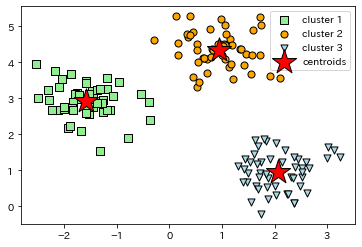

In [16]:
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=650, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend()

In [19]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)

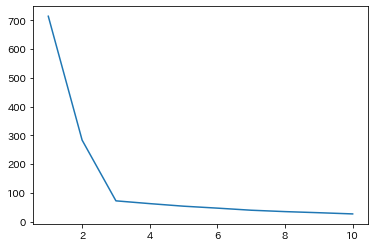

In [23]:
plt.plot(range(1, 11), distortions)

In [25]:
km = KMeans(n_clusters=3)

In [26]:
y_km = km.fit_predict(X)

In [32]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km)

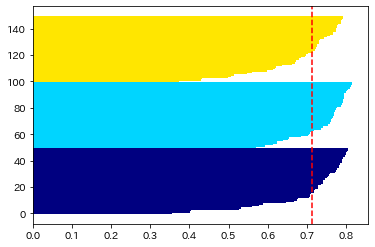

In [37]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')

In [49]:
def cluster_silhouette_plot(X, **kwargs):
    """ Make a silhouette plot
    
    Parameters
    ----------
    X: [array-like]
        should be scaled, data to fit kmeans and plot
    """
    # clustering
    km = KMeans(**kwargs)
    y = km.fit_predict(X)
    cluster_labels = np.unique(y)
    n_clusters = cluster_labels.shape[0]
    
    # plot
    silhouette_vals = silhouette_samples(X, y)
    
    # plot
    silhouette_plot(y, silhouette_vals)


In [50]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

def silhouette_plot(y, silhouette_vals):
    ''' Make a silhouette plot
    
    Parameters
    ----------
    y: [array-like]
        label of clusters
    silhouette_vals: [array-like]
        return value of silhouette_samples(X, y)
    '''
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    

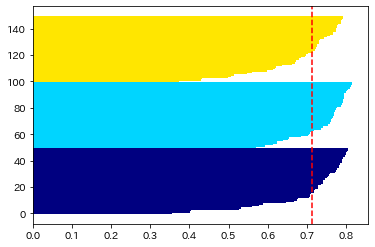

In [51]:
cluster_silhouette_plot(X, n_clusters=3)

In [52]:
km = KMeans(n_clusters=2)
y_km = km.fit_predict(X)

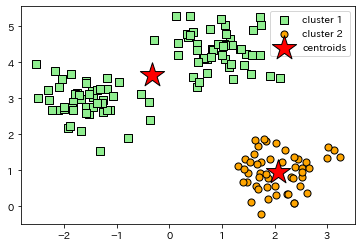

In [53]:
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=650, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend()

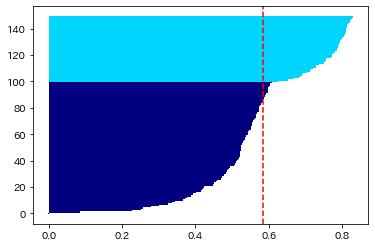

In [54]:
cluster_silhouette_plot(X, n_clusters=2)

In [55]:
import pandas as pd
import numpy as np

/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [56]:
variables = ['X', 'Y', 'Z']

In [57]:
labels = 'ID_0 ID_1 ID_2 ID_3 ID_4'.split()

In [58]:
X = np.random.random_sample([5, 3])*10

In [60]:
df = pd.DataFrame(X, columns=variables, index=labels)

In [61]:
df

,X,Y,Z
ID_0,4.518169,1.169242,4.900736
ID_1,0.703661,9.573301,6.317677
ID_2,6.086322,5.999131,4.992769
ID_3,5.369764,6.534922,5.786521
ID_4,5.213534,0.683447,4.297623


In [62]:
from scipy.spatial.distance import pdist, squareform

In [72]:
row_dist = pd.DataFrame(squareform(pdist(df)), columns=labels, index=labels)

In [71]:
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,9.337365,5.078918,5.504575,1.040805
ID_1,9.337365,0.000000,6.595689,5.593424,10.170992
ID_2,5.078918,6.595689,0.000000,1.196064,5.431527
ID_3,5.504575,5.593424,1.196064,0.000000,6.039949
ID_4,1.040805,10.170992,5.431527,6.039949,0.000000


In [73]:
from scipy.cluster.hierarchy import linkage

In [77]:
linkage(row_dist, method='complete')

/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


array([[ 0.        ,  4.        ,  1.80898919,  2.        ],
       [ 2.        ,  3.        ,  2.10167376,  2.        ],
       [ 5.        ,  6.        , 11.47956762,  4.        ],
       [ 1.        ,  7.        , 16.65189826,  5.        ]])

In [81]:
row_clusters = linkage(pdist(df), method='complete')
row_clusters

array([[ 0.        ,  4.        ,  1.04080519,  2.        ],
       [ 2.        ,  3.        ,  1.1960637 ,  2.        ],
       [ 5.        ,  6.        ,  6.03994864,  4.        ],
       [ 1.        ,  7.        , 10.17099177,  5.        ]])

In [80]:
linkage(df.values, method='complete')

array([[ 0.        ,  4.        ,  1.04080519,  2.        ],
       [ 2.        ,  3.        ,  1.1960637 ,  2.        ],
       [ 5.        ,  6.        ,  6.03994864,  4.        ],
       [ 1.        ,  7.        , 10.17099177,  5.        ]])

In [86]:
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clus.'],
             index=[f'cluster {i+1}' for i in range(row_clusters.shape[0])]
            )

,row label 1,row label 2,distance,no. of items in clus.
cluster 1,0.0,4.0,1.040805,2.0
cluster 2,2.0,3.0,1.196064,2.0
cluster 3,5.0,6.0,6.039949,4.0
cluster 4,1.0,7.0,10.170992,5.0


In [89]:
from scipy.cluster.hierarchy import dendrogram

<Figure size 432x288 with 0 Axes>

Text(30.375, 0.5, 'Euclidean distance')

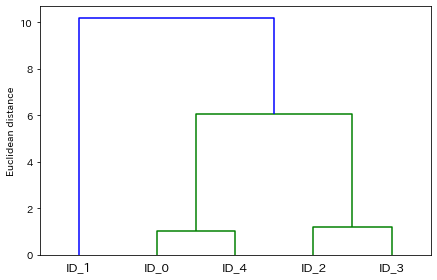

In [100]:
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel("Euclidean distance")

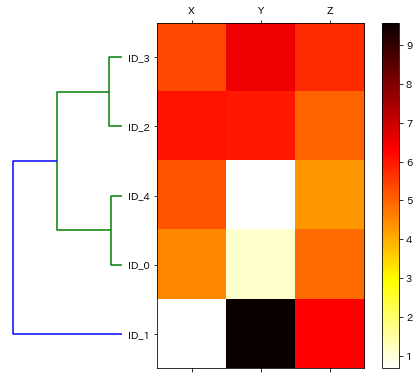

In [113]:
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([.09, .1, .2, .6])
row_dendr = dendrogram(row_clusters, orientation='left')

df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])

for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index));

In [114]:
from sklearn.cluster import AgglomerativeClustering

In [116]:
ac = AgglomerativeClustering(n_clusters=3, linkage='complete')

In [117]:
labels = ac.fit_predict(X)

In [118]:
labels

array([2, 1, 0, 0, 2])

In [122]:
from sklearn.datasets import make_moons

In [123]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

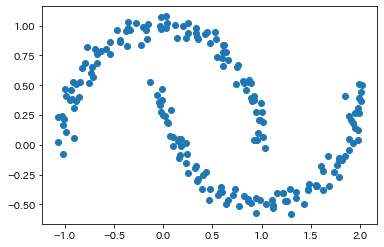

In [124]:
plt.scatter(X[:, 0], X[:, 1])

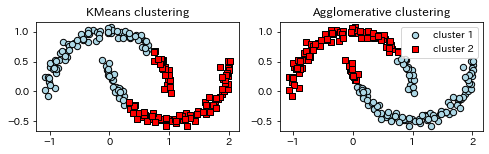

In [129]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))
km = KMeans(n_clusters=2, random_state=0)

y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0, 0], X[y_km==0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km==1, 0], X[y_km==1, 1], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')
ax1.set_title('KMeans clustering')

ac = AgglomerativeClustering(n_clusters=2, linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0, 0], X[y_ac==0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac==1, 0], X[y_ac==1, 1], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()

In [130]:
from sklearn.cluster import DBSCAN

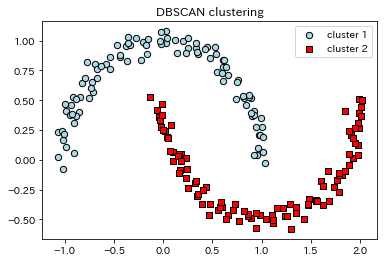

In [135]:
model = DBSCAN(eps=0.2)
y = model.fit_predict(X)
plt.scatter(X[y==0, 0], X[y==0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')
plt.title('DBSCAN clustering')
plt.legend()